## Task 1: Data Preprocessing

### Step 1.1: Load the Data
Download **Apple stock data** (from January 2015 to January 2024) from [Yahoo Finance](https://finance.yahoo.com/) or use a similar source. The dataset should include the following columns:
- `Open`
- `High`
- `Low`
- `Close`
- `Volume`
- `Adj Close` (Adjusted Close)

Load the dataset into a pandas DataFrame and inspect the first few rows to verify the data.

In [1]:
import yfinance as yf
import pandas as pd

# Download Apple stock data
stock_prices = yf.download('AAPL', 
                   start='2015-01-01', 
                   end='2024-01-31')

# Display the first few rows
print("First few rows of Apple stock data:")
stock_prices.head()

[*********************100%***********************]  1 of 1 completed

First few rows of Apple stock data:


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-01-02 00:00:00+00:00,24.373960,27.332500,27.860001,26.837500,27.847500,212818400
2015-01-05 00:00:00+00:00,23.687305,26.562500,27.162500,26.352501,27.072500,257142000
2015-01-06 00:00:00+00:00,23.689529,26.565001,26.857500,26.157499,26.635000,263188400
2015-01-07 00:00:00+00:00,24.021721,26.937500,27.049999,26.674999,26.799999,160423600
2015-01-08 00:00:00+00:00,24.944681,27.972500,28.037500,27.174999,27.307501,237458000


In [2]:
# Check for missing values in the dataset
stock_prices.isnull().sum()

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

**There are no missing values in the dataset. Hence, we proceed with the calculation of the daily returns. We expect to have only one missing value in the daily returns due to the nature of the calculation.**

### Step 1.2: Calculate Daily Returns
Calculate the daily percentage return for Apple stock based on the adjusted closing price. This can be computed using:
- `Daily_Return = (Adj Close_t - Adj Close_t-1) / Adj Close_t-1 * 100`

Ensure that missing values in the dataset (due to holidays or weekends) are handled appropriately.

In [3]:
# Calculate the daily returns
stock_prices['Daily_Returns'] = stock_prices['Adj Close'].pct_change() * 100
stock_prices.head()


Price,Adj Close,Close,High,Low,Open,Volume,Daily_Returns
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,
2015-01-02 00:00:00+00:00,24.373960,27.332500,27.860001,26.837500,27.847500,212818400,NaN
2015-01-05 00:00:00+00:00,23.687305,26.562500,27.162500,26.352501,27.072500,257142000,-2.817166
2015-01-06 00:00:00+00:00,23.689529,26.565001,26.857500,26.157499,26.635000,263188400,0.009389
2015-01-07 00:00:00+00:00,24.021721,26.937500,27.049999,26.674999,26.799999,160423600,1.402271
2015-01-08 00:00:00+00:00,24.944681,27.972500,28.037500,27.174999,27.307501,237458000,3.842191


In [4]:
# Remove the first row as it is a NaN value
stock_prices = stock_prices.dropna()

# Double check if there are any missing values in the daily returns
stock_prices.isnull().sum()


Price          Ticker
Adj Close      AAPL      0
Close          AAPL      0
High           AAPL      0
Low            AAPL      0
Open           AAPL      0
Volume         AAPL      0
Daily_Returns            0
dtype: int64

### Step 1.3: Define Extreme Events
Define an **extreme event** as any day where the percentage change in the adjusted close price exceeds **±2%**. Create a binary column `Extreme_Event` with the following logic:
- `1` if the daily return is greater than 2% or less than -2% (extreme event).
- `0` if the daily return is between -2% and 2% (no event).

In [5]:
# Create the Extreme_Event column
stock_prices['Extreme_Event'] = (abs(stock_prices['Daily_Returns']) > 2).astype(int)
stock_prices.head()


Price,Adj Close,Close,High,Low,Open,Volume,Daily_Returns,Extreme_Event
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,,
2015-01-05 00:00:00+00:00,23.687305,26.562500,27.162500,26.352501,27.072500,257142000,-2.817166,1
2015-01-06 00:00:00+00:00,23.689529,26.565001,26.857500,26.157499,26.635000,263188400,0.009389,0
2015-01-07 00:00:00+00:00,24.021721,26.937500,27.049999,26.674999,26.799999,160423600,1.402271,0
2015-01-08 00:00:00+00:00,24.944681,27.972500,28.037500,27.174999,27.307501,237458000,3.842191,1
2015-01-09 00:00:00+00:00,24.971441,28.002501,28.312500,27.552500,28.167500,214798000,0.107278,0


**Let's see how many extreme events there are in the dataset. This will helps us understand if there is a class imbalance in the dataset.**

In [6]:
# Count the number of extreme events
extreme_events = stock_prices[stock_prices['Extreme_Event'] == 1]
print(f"Number of extreme events: {len(extreme_events)}")

# Print the percentage of extreme events and no extreme events in the dataset
print(f"Percentage of extreme events: {len(extreme_events) / len(stock_prices) * 100:.2f}%")
print(f"Percentage of no extreme events: {(len(stock_prices) - len(extreme_events)) / len(stock_prices) * 100:.2f}%")



Number of extreme events: 460
Percentage of extreme events: 20.15%
Percentage of no extreme events: 79.85%


**The dataset is moderately imbalanced with approximately 20% of the data being extreme events. This is a challenge that we will have to address in the modelling phase.**

Next, shift the target variable `Extreme_Event` by one day so that the model is trained to predict if an extreme event occurs **tomorrow** based on today's data.

In [7]:
# Shift the Extreme_Event column by one day
stock_prices['Extreme_Event'] = stock_prices['Extreme_Event'].shift(-1)
# Remove the last row as it is a NaN value
stock_prices = stock_prices.dropna()
stock_prices.head()

Price,Adj Close,Close,High,Low,Open,Volume,Daily_Returns,Extreme_Event
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,,
2015-01-05 00:00:00+00:00,23.687305,26.562500,27.162500,26.352501,27.072500,257142000,-2.817166,0.0
2015-01-06 00:00:00+00:00,23.689529,26.565001,26.857500,26.157499,26.635000,263188400,0.009389,0.0
2015-01-07 00:00:00+00:00,24.021721,26.937500,27.049999,26.674999,26.799999,160423600,1.402271,1.0
2015-01-08 00:00:00+00:00,24.944681,27.972500,28.037500,27.174999,27.307501,237458000,3.842191,0.0
2015-01-09 00:00:00+00:00,24.971441,28.002501,28.312500,27.552500,28.167500,214798000,0.107278,1.0


### Step 1.4: Split Data into Features and Target
Extract the following columns as features for the model:
- `Open`
- `High`
- `Low`
- `Close`
- `Volume`
- `Daily_Return`

The target variable will be the `Extreme_Event` column created earlier.

Split the data into **70% training**, **15% validation**, and **15% test** sets. Make sure to split the data in sequence to preserve the time-series nature of the stock data and avoid data leackage.


In [8]:
# Extract features and labels
features = stock_prices.iloc[:, :7]  
labels = stock_prices.iloc[:, -1]    # Last column (Extreme_Event_Tomorrow)

# Define train/val/test split ratios
train_ratio = 0.8
val_ratio = 0.9

# Split into train, validation and test sets
train_size = int(train_ratio * len(stock_prices))
val_size = int(val_ratio * len(stock_prices))

X_train = features.iloc[:train_size]
y_train = labels.iloc[:train_size]

X_val = features.iloc[train_size:val_size]
y_val = labels.iloc[train_size:val_size]

X_test = features.iloc[val_size:]
y_test = labels.iloc[val_size:]

print(f"Training features shape: {X_train.shape}, labels shape: {y_train.shape}")
print(f"Validation features shape: {X_val.shape}, labels shape: {y_val.shape}")
print(f"Test features shape: {X_test.shape}, labels shape: {y_test.shape}")

Training features shape: (1825, 7), labels shape: (1825,)
Validation features shape: (228, 7), labels shape: (228,)
Test features shape: (229, 7), labels shape: (229,)


Let's check the distribution of labels in the training, validation and test sets.

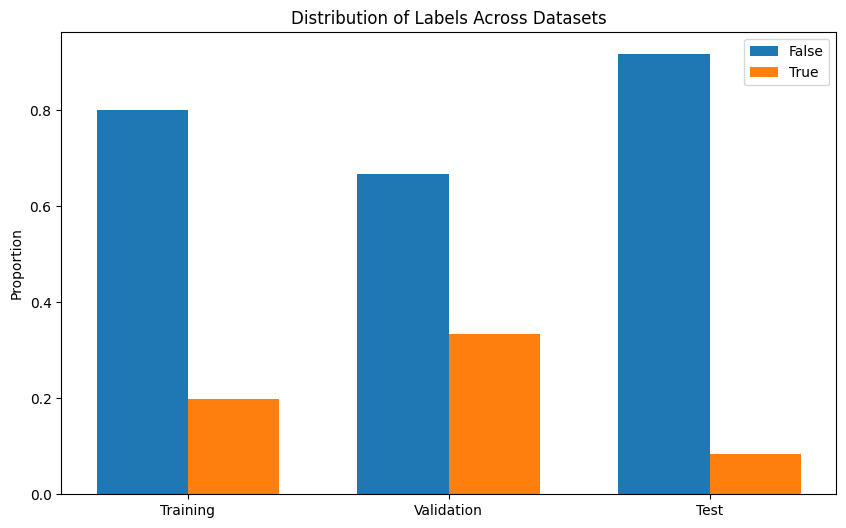

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate distributions
train_dist = y_train.value_counts() / len(y_train)
val_dist = y_val.value_counts() / len(y_val)
test_dist = y_test.value_counts() / len(y_test)

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(3)
width = 0.35

# Group bars by False/True
false_vals = [train_dist[0], val_dist[0], test_dist[0]]
true_vals = [train_dist[1], val_dist[1], test_dist[1]]

ax.bar(x - width/2, false_vals, width, label='False')
ax.bar(x + width/2, true_vals, width, label='True')

ax.set_xticks(x)
ax.set_xticklabels(['Training', 'Validation', 'Test'])
ax.set_ylabel('Proportion')
ax.set_title('Distribution of Labels Across Datasets')
ax.legend()

plt.show()


## Task 2: Random Forest Model

### Step 2.1: Model Training
You are required to build a **Random Forest Classifier** to predict extreme events using 10 days of historical stock data. You can use **scikit-learn** for this task.

- Train the Random Forest classifier using the training data (features from the past 10 days).
- Evaluate the model on the validation set to tune hyperparameters if necessary.


In [11]:
from typing import Tuple

def time_series_to_supervised(
    X: pd.DataFrame,
    y: pd.Series,
    lookback: int = 10,
    dropnan: bool = True
) -> Tuple[pd.DataFrame, pd.Series]:
    """
    Prepare time series data for classification by creating sequences of historical features
    and their corresponding future labels.
    
    Parameters:
    -----------
    X : pd.DataFrame
        DataFrame containing feature columns
    y : pd.Series
        Series containing target labels
    lookback : int, default=10
        Number of historical time steps to use for prediction
    dropnan : bool, default=True
        Whether to remove rows with NaN values
    
    Returns:
    --------
    Tuple[pd.DataFrame, pd.Series]
        X: DataFrame with historical features
        y: Series with target labels
    """
    # Clean column names - remove the ticker part
    X.columns = [col[0] if isinstance(col, tuple) else col for col in X.columns]
    
    cols = []
    names = []
    
    # Create lagged feature columns
    for i in range(lookback, 0, -1):
        cols.append(X.shift(i))        # Shifts entire DataFrame, creating all lagged features
        for col in X.columns:          # Creates corresponding names for all shifted columns
            names.append(f'{col}(t-{i})')
    
    # Combine all lagged features
    X_transformed = pd.concat(cols, axis=1)
    X_transformed.columns = names
    
    # Prepare labels (predict next day)
    y_transformed = y[lookback:]
    
    # Remove rows with NaN if specified
    if dropnan:
        X_transformed = X_transformed.dropna()
        y_transformed = y_transformed[:len(X_transformed)]
    
    assert len(X_transformed) == len(y_transformed), "Features and labels must have same length"
    
    return X_transformed, y_transformed




In [12]:
X_train, y_train = time_series_to_supervised(X_train, y_train, lookback=10)
X_val, y_val = time_series_to_supervised(X_val, y_val, lookback=10)
X_test, y_test = time_series_to_supervised(X_test, y_test, lookback=10)


In [13]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

def objective(trial):
    """
    Objective function with refined search space based on previous results.
    """
    params = {
        # Refine around n_estimators=776
        'n_estimators': trial.suggest_int('n_estimators', 600, 1000),
        
        # Refine around max_depth=88
        'max_depth': trial.suggest_int('max_depth', 70, 100),
        
        # Refine around min_samples_split=9
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 15),
        
        # Refine around min_samples_leaf=1
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        
        # Refine around max_features=0.95
        'max_features': trial.suggest_float('max_features', 0.8, 1.0),
        
        # Keep successful criterion
        'criterion': trial.suggest_categorical('criterion', ['entropy', 'log_loss']),
        
        # Refine around max_leaf_nodes=507
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 400, 600),
        
        # Refine around min_impurity_decrease=0.062
        'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.04, 0.08),
        
        # Keep successful bootstrap=True
        'bootstrap': True,
        
        # Keep successful class_weight
        'class_weight': 'balanced_subsample',
        
        # Fixed parameters
        'random_state': 42,
        'n_jobs': -1
    }
    
    # Create and train model
    model = RandomForestClassifier(**params)
    model.fit(X_train.values, y_train.values.astype(int))
    
    # Evaluate on validation set
    y_pred = model.predict(X_val.values)
    f1 = f1_score(y_val.values.astype(int), y_pred)
    
    return f1

# Create and run study with more focused search
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, n_jobs=-1, show_progress_bar=True)

# Print results
print("\nBest trial:")
print(f"  Value (F1 Score): {study.best_trial.value:.4f}")
print("\nBest parameters:")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

# Train final model with best parameters
best_params = study.best_trial.params
final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train.values, y_train.values.astype(int))

# Evaluate on test set
y_pred = final_model.predict(X_test.values)
print("\nTest Set Performance:")
print(f"F1 Score: {f1_score(y_test.values.astype(int), y_pred):.4f}")

/Users/nikolaosmourdoukoutas/ai2c_assignment/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-10-30 23:30:00,281] A new study created in memory with name: no-name-53a73342-e826-4539-bae3-9f1ebca6ed96
Best trial: 1. Best value: 0.506849:   1%|          | 1/100 [00:10<16:44, 10.15s/it]

[I 2024-10-30 23:30:10,306] Trial 1 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 608, 'max_depth': 87, 'min_samples_split': 13, 'min_samples_leaf': 5, 'max_features': 0.8222129165938141, 'criterion': 'entropy', 'max_leaf_nodes': 576, 'min_impurity_decrease': 0.06359205175995873}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:   2%|▏         | 2/100 [00:11<07:43,  4.73s/it]

[I 2024-10-30 23:30:11,181] Trial 5 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 666, 'max_depth': 75, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 0.8306407988724558, 'criterion': 'entropy', 'max_leaf_nodes': 431, 'min_impurity_decrease': 0.046379756485291426}. Best is trial 1 with value: 0.5068493150684932.


[I 2024-10-30 23:30:12,244] Trial 8 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 755, 'max_depth': 96, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 0.9392404615634288, 'criterion': 'entropy', 'max_leaf_nodes': 421, 'min_impurity_decrease': 0.059612057494869704}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:   4%|▍         | 4/100 [00:12<03:11,  2.00s/it]

[I 2024-10-30 23:30:12,593] Trial 7 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 786, 'max_depth': 98, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 0.9207506548495609, 'criterion': 'entropy', 'max_leaf_nodes': 422, 'min_impurity_decrease': 0.0764954375815079}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:   5%|▌         | 5/100 [00:13<02:23,  1.51s/it]

[I 2024-10-30 23:30:13,330] Trial 6 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 865, 'max_depth': 73, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 0.8603285867901015, 'criterion': 'entropy', 'max_leaf_nodes': 426, 'min_impurity_decrease': 0.05863181766996214}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:   7%|▋         | 7/100 [00:13<01:14,  1.25it/s]

[I 2024-10-30 23:30:13,716] Trial 9 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 855, 'max_depth': 100, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 0.9346083492649488, 'criterion': 'log_loss', 'max_leaf_nodes': 516, 'min_impurity_decrease': 0.05124888644411141}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:30:13,837] Trial 2 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 888, 'max_depth': 73, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 0.9151819281691581, 'criterion': 'entropy', 'max_leaf_nodes': 465, 'min_impurity_decrease': 0.06755113255688688}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:   8%|▊         | 8/100 [00:14<00:59,  1.54it/s]

[I 2024-10-30 23:30:14,057] Trial 3 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 916, 'max_depth': 91, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 0.8616004086032805, 'criterion': 'entropy', 'max_leaf_nodes': 512, 'min_impurity_decrease': 0.0720193711033828}. Best is trial 1 with value: 0.5068493150684932.


[I 2024-10-30 23:30:14,670] Trial 4 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 944, 'max_depth': 90, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 0.958991110603107, 'criterion': 'entropy', 'max_leaf_nodes': 598, 'min_impurity_decrease': 0.07113090365795105}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  10%|█         | 10/100 [00:14<00:45,  2.00it/s]

[I 2024-10-30 23:30:14,748] Trial 0 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 939, 'max_depth': 80, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 0.8882668378599473, 'criterion': 'log_loss', 'max_leaf_nodes': 543, 'min_impurity_decrease': 0.07852950444285396}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  11%|█         | 11/100 [00:22<03:58,  2.68s/it]

[I 2024-10-30 23:30:22,541] Trial 13 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 627, 'max_depth': 91, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 0.8107819046661673, 'criterion': 'log_loss', 'max_leaf_nodes': 560, 'min_impurity_decrease': 0.06282524664536493}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  12%|█▏        | 12/100 [00:23<03:10,  2.16s/it]

[I 2024-10-30 23:30:23,574] Trial 11 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 800, 'max_depth': 94, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 0.9553763795969061, 'criterion': 'entropy', 'max_leaf_nodes': 434, 'min_impurity_decrease': 0.050320251907821904}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:30:23,625] Trial 15 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 605, 'max_depth': 91, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 0.9879048154068497, 'criterion': 'entropy', 'max_leaf_nodes': 548, 'min_impurity_decrease': 0.06978024360610428}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  14%|█▍        | 14/100 [00:24<01:44,  1.21s/it]

[I 2024-10-30 23:30:23,823] Trial 10 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 847, 'max_depth': 82, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 0.9978595290886557, 'criterion': 'entropy', 'max_leaf_nodes': 561, 'min_impurity_decrease': 0.040772892156620805}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  15%|█▌        | 15/100 [00:24<01:25,  1.00s/it]

[I 2024-10-30 23:30:24,562] Trial 12 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 798, 'max_depth': 95, 'min_samples_split': 13, 'min_samples_leaf': 4, 'max_features': 0.9553479574978986, 'criterion': 'entropy', 'max_leaf_nodes': 438, 'min_impurity_decrease': 0.05828467937256963}. Best is trial 1 with value: 0.5068493150684932.


[I 2024-10-30 23:30:26,882] Trial 14 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 884, 'max_depth': 98, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 0.9075981713647931, 'criterion': 'log_loss', 'max_leaf_nodes': 513, 'min_impurity_decrease': 0.05916113131284257}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  17%|█▋        | 17/100 [00:27<01:28,  1.07s/it]

[I 2024-10-30 23:30:27,036] Trial 16 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 846, 'max_depth': 98, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 0.9788822810489182, 'criterion': 'log_loss', 'max_leaf_nodes': 420, 'min_impurity_decrease': 0.05776754116975591}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  18%|█▊        | 18/100 [00:28<01:29,  1.09s/it]

[I 2024-10-30 23:30:28,255] Trial 17 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 919, 'max_depth': 97, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 0.9268731119732815, 'criterion': 'entropy', 'max_leaf_nodes': 417, 'min_impurity_decrease': 0.06126160125217346}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  19%|█▉        | 19/100 [00:30<01:45,  1.30s/it]

[I 2024-10-30 23:30:30,190] Trial 19 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 994, 'max_depth': 80, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 0.994734271007435, 'criterion': 'log_loss', 'max_leaf_nodes': 548, 'min_impurity_decrease': 0.07841758888768373}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:30:30,308] Trial 18 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 996, 'max_depth': 80, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.9859635567958366, 'criterion': 'log_loss', 'max_leaf_nodes': 550, 'min_impurity_decrease': 0.07937556225054555}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  21%|██        | 21/100 [00:35<02:50,  2.16s/it]

[I 2024-10-30 23:30:35,318] Trial 23 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 708, 'max_depth': 82, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 0.8799981047347497, 'criterion': 'log_loss', 'max_leaf_nodes': 598, 'min_impurity_decrease': 0.07977600896672726}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  22%|██▏       | 22/100 [00:37<02:53,  2.23s/it]

[I 2024-10-30 23:30:37,699] Trial 20 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 997, 'max_depth': 81, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 0.9940841470456845, 'criterion': 'log_loss', 'max_leaf_nodes': 557, 'min_impurity_decrease': 0.07919007583475028}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  23%|██▎       | 23/100 [00:38<02:27,  1.92s/it]

[I 2024-10-30 23:30:38,898] Trial 21 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 989, 'max_depth': 83, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 0.8856483538145312, 'criterion': 'log_loss', 'max_leaf_nodes': 597, 'min_impurity_decrease': 0.07991440737216256}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:30:39,055] Trial 22 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 993, 'max_depth': 82, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 0.8781585046151781, 'criterion': 'log_loss', 'max_leaf_nodes': 591, 'min_impurity_decrease': 0.07840215257765383}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  25%|██▌       | 25/100 [00:39<01:24,  1.13s/it]

[I 2024-10-30 23:30:39,561] Trial 24 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 995, 'max_depth': 82, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 0.8779820092911778, 'criterion': 'log_loss', 'max_leaf_nodes': 598, 'min_impurity_decrease': 0.07986217318226799}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  26%|██▌       | 26/100 [00:41<01:36,  1.31s/it]

[I 2024-10-30 23:30:41,349] Trial 28 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 717, 'max_depth': 86, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 0.869345394664849, 'criterion': 'log_loss', 'max_leaf_nodes': 600, 'min_impurity_decrease': 0.07420614981449433}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  27%|██▋       | 27/100 [00:41<01:16,  1.05s/it]

[I 2024-10-30 23:30:41,672] Trial 29 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 740, 'max_depth': 85, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 0.8786733334814266, 'criterion': 'log_loss', 'max_leaf_nodes': 600, 'min_impurity_decrease': 0.07498170202725074}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  28%|██▊       | 28/100 [00:42<00:57,  1.24it/s]

[I 2024-10-30 23:30:41,941] Trial 26 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 992, 'max_depth': 82, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 0.8810005552817222, 'criterion': 'log_loss', 'max_leaf_nodes': 589, 'min_impurity_decrease': 0.07979840997016258}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:30:41,976] Trial 25 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 992, 'max_depth': 82, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 0.8759588057260871, 'criterion': 'log_loss', 'max_leaf_nodes': 599, 'min_impurity_decrease': 0.07959361726538537}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  30%|███       | 30/100 [00:42<00:45,  1.52it/s]

[I 2024-10-30 23:30:42,940] Trial 27 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 994, 'max_depth': 82, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 0.8814827337037616, 'criterion': 'log_loss', 'max_leaf_nodes': 597, 'min_impurity_decrease': 0.07932153605046977}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  31%|███       | 31/100 [00:49<02:50,  2.46s/it]

[I 2024-10-30 23:30:49,645] Trial 30 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 958, 'max_depth': 71, 'min_samples_split': 13, 'min_samples_leaf': 4, 'max_features': 0.8899319531938816, 'criterion': 'log_loss', 'max_leaf_nodes': 468, 'min_impurity_decrease': 0.06551608447195903}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  32%|███▏      | 32/100 [00:50<02:16,  2.01s/it]

[I 2024-10-30 23:30:50,586] Trial 32 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 717, 'max_depth': 77, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 0.8188136807377926, 'criterion': 'entropy', 'max_leaf_nodes': 465, 'min_impurity_decrease': 0.06661392805313518}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  33%|███▎      | 33/100 [00:51<01:59,  1.79s/it]

[I 2024-10-30 23:30:51,811] Trial 31 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 943, 'max_depth': 70, 'min_samples_split': 13, 'min_samples_leaf': 4, 'max_features': 0.890560517210772, 'criterion': 'entropy', 'max_leaf_nodes': 471, 'min_impurity_decrease': 0.06835171118872131}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  34%|███▍      | 34/100 [00:53<01:57,  1.77s/it]

[I 2024-10-30 23:30:53,606] Trial 34 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 933, 'max_depth': 70, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 0.8351778974269619, 'criterion': 'entropy', 'max_leaf_nodes': 465, 'min_impurity_decrease': 0.06588420969614979}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:30:53,769] Trial 33 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 941, 'max_depth': 77, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 0.8016571773436012, 'criterion': 'entropy', 'max_leaf_nodes': 465, 'min_impurity_decrease': 0.06665607419472765}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  36%|███▌      | 36/100 [00:55<01:31,  1.43s/it]

[I 2024-10-30 23:30:55,572] Trial 35 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 949, 'max_depth': 70, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 0.8304024091886836, 'criterion': 'entropy', 'max_leaf_nodes': 463, 'min_impurity_decrease': 0.06553095733961867}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:30:55,627] Trial 36 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 929, 'max_depth': 76, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 0.83696575910284, 'criterion': 'entropy', 'max_leaf_nodes': 466, 'min_impurity_decrease': 0.0641334733767989}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  38%|███▊      | 38/100 [00:55<00:52,  1.18it/s]

[I 2024-10-30 23:30:56,057] Trial 38 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 930, 'max_depth': 77, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 0.8404821757668295, 'criterion': 'entropy', 'max_leaf_nodes': 460, 'min_impurity_decrease': 0.06550200327425662}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  39%|███▉      | 39/100 [00:56<00:43,  1.40it/s]

[I 2024-10-30 23:30:56,511] Trial 37 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 949, 'max_depth': 70, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 0.8422884089096019, 'criterion': 'entropy', 'max_leaf_nodes': 472, 'min_impurity_decrease': 0.06704347744956725}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  40%|████      | 40/100 [00:56<00:39,  1.54it/s]

[I 2024-10-30 23:30:57,038] Trial 39 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 949, 'max_depth': 77, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 0.8496886204228115, 'criterion': 'entropy', 'max_leaf_nodes': 461, 'min_impurity_decrease': 0.06754778049708168}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  41%|████      | 41/100 [01:03<02:23,  2.43s/it]

[I 2024-10-30 23:31:03,434] Trial 40 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 927, 'max_depth': 77, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 0.8350856437653573, 'criterion': 'entropy', 'max_leaf_nodes': 484, 'min_impurity_decrease': 0.06992208487398914}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  42%|████▏     | 42/100 [01:04<01:49,  1.89s/it]

[I 2024-10-30 23:31:04,084] Trial 41 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 909, 'max_depth': 88, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 0.8431478601179372, 'criterion': 'entropy', 'max_leaf_nodes': 530, 'min_impurity_decrease': 0.07123476888602857}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  43%|████▎     | 43/100 [01:05<01:37,  1.72s/it]

[I 2024-10-30 23:31:05,535] Trial 42 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 901, 'max_depth': 88, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 0.8460947079492316, 'criterion': 'entropy', 'max_leaf_nodes': 490, 'min_impurity_decrease': 0.07195243201137445}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  44%|████▍     | 44/100 [01:07<01:35,  1.70s/it]

[I 2024-10-30 23:31:07,193] Trial 43 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 895, 'max_depth': 89, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 0.8497321617660035, 'criterion': 'entropy', 'max_leaf_nodes': 531, 'min_impurity_decrease': 0.07198861702139343}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:31:07,213] Trial 44 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 897, 'max_depth': 89, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 0.8463926141967417, 'criterion': 'entropy', 'max_leaf_nodes': 529, 'min_impurity_decrease': 0.07235682275312028}. Best is trial 1 with value: 0.5068493150684932.


[I 2024-10-30 23:31:09,120] Trial 46 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 902, 'max_depth': 88, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 0.8529680988572993, 'criterion': 'entropy', 'max_leaf_nodes': 489, 'min_impurity_decrease': 0.07214024716108758}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:31:09,182] Trial 45 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 901, 'max_depth': 88, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 0.8505568478956662, 'criterion': 'entropy', 'max_leaf_nodes': 532, 'min_impurity_decrease': 0.07214713424771524}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  48%|████▊     | 48/100 [01:09<00:40,  1.28it/s]

[I 2024-10-30 23:31:09,257] Trial 47 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 897, 'max_depth': 88, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': 0.8556034414207475, 'criterion': 'entropy', 'max_leaf_nodes': 532, 'min_impurity_decrease': 0.07155319592331358}. Best is trial 1 with value: 0.5068493150684932.


[I 2024-10-30 23:31:09,880] Trial 48 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 905, 'max_depth': 88, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': 0.8569479170130627, 'criterion': 'entropy', 'max_leaf_nodes': 498, 'min_impurity_decrease': 0.07243419794126607}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  50%|█████     | 50/100 [01:10<00:28,  1.77it/s]

[I 2024-10-30 23:31:09,990] Trial 49 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 891, 'max_depth': 88, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': 0.9076274735321831, 'criterion': 'entropy', 'max_leaf_nodes': 533, 'min_impurity_decrease': 0.07220439911156623}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  51%|█████     | 51/100 [01:16<01:51,  2.28s/it]

[I 2024-10-30 23:31:16,446] Trial 50 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 898, 'max_depth': 88, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_features': 0.9051931260882686, 'criterion': 'entropy', 'max_leaf_nodes': 575, 'min_impurity_decrease': 0.07288841793771013}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  52%|█████▏    | 52/100 [01:17<01:28,  1.85s/it]

[I 2024-10-30 23:31:17,186] Trial 51 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 889, 'max_depth': 90, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_features': 0.904791242200208, 'criterion': 'entropy', 'max_leaf_nodes': 571, 'min_impurity_decrease': 0.0730537393829513}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  53%|█████▎    | 53/100 [01:18<01:13,  1.56s/it]

[I 2024-10-30 23:31:18,213] Trial 52 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 865, 'max_depth': 91, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 0.9045222488692194, 'criterion': 'entropy', 'max_leaf_nodes': 578, 'min_impurity_decrease': 0.07379911487839999}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  54%|█████▍    | 54/100 [01:19<01:09,  1.50s/it]

[I 2024-10-30 23:31:19,528] Trial 53 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 823, 'max_depth': 93, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 0.9077570728036173, 'criterion': 'entropy', 'max_leaf_nodes': 576, 'min_impurity_decrease': 0.0761364495876772}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  55%|█████▌    | 55/100 [01:19<00:53,  1.19s/it]

[I 2024-10-30 23:31:20,043] Trial 54 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 872, 'max_depth': 94, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 0.9131034194994093, 'criterion': 'entropy', 'max_leaf_nodes': 566, 'min_impurity_decrease': 0.07616823219956068}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  57%|█████▋    | 57/100 [01:21<00:44,  1.03s/it]

[I 2024-10-30 23:31:22,026] Trial 55 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 831, 'max_depth': 93, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 0.9167155378963325, 'criterion': 'entropy', 'max_leaf_nodes': 575, 'min_impurity_decrease': 0.07558359613457097}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:31:22,210] Trial 56 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 834, 'max_depth': 92, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 0.9082417777943216, 'criterion': 'entropy', 'max_leaf_nodes': 578, 'min_impurity_decrease': 0.07619362874386493}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  58%|█████▊    | 58/100 [01:22<00:33,  1.24it/s]

[I 2024-10-30 23:31:22,418] Trial 57 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 856, 'max_depth': 92, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 0.9081998658728081, 'criterion': 'entropy', 'max_leaf_nodes': 578, 'min_impurity_decrease': 0.07609773221118425}. Best is trial 1 with value: 0.5068493150684932.


[I 2024-10-30 23:31:22,763] Trial 58 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 828, 'max_depth': 94, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 0.9555439152585413, 'criterion': 'entropy', 'max_leaf_nodes': 573, 'min_impurity_decrease': 0.07596186160518117}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:31:23,027] Trial 59 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 832, 'max_depth': 93, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 0.9642643674666646, 'criterion': 'entropy', 'max_leaf_nodes': 578, 'min_impurity_decrease': 0.05551189030754268}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  61%|██████    | 61/100 [01:27<01:12,  1.86s/it]

[I 2024-10-30 23:31:27,924] Trial 60 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 655, 'max_depth': 93, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 0.9489561088681708, 'criterion': 'entropy', 'max_leaf_nodes': 443, 'min_impurity_decrease': 0.04009462290168028}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  62%|██████▏   | 62/100 [01:28<01:02,  1.63s/it]

[I 2024-10-30 23:31:29,027] Trial 61 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 643, 'max_depth': 93, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 0.9498757801670294, 'criterion': 'entropy', 'max_leaf_nodes': 408, 'min_impurity_decrease': 0.040593082376792426}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  63%|██████▎   | 63/100 [01:29<00:50,  1.36s/it]

[I 2024-10-30 23:31:29,713] Trial 62 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 638, 'max_depth': 94, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 0.9530108696247128, 'criterion': 'entropy', 'max_leaf_nodes': 443, 'min_impurity_decrease': 0.04445473827837759}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  64%|██████▍   | 64/100 [01:31<00:54,  1.51s/it]

[I 2024-10-30 23:31:31,543] Trial 63 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 649, 'max_depth': 75, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 0.9490125583160922, 'criterion': 'entropy', 'max_leaf_nodes': 408, 'min_impurity_decrease': 0.04501147764945875}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  65%|██████▌   | 65/100 [01:32<00:43,  1.23s/it]

[I 2024-10-30 23:31:32,147] Trial 64 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 652, 'max_depth': 74, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 0.9424401405552678, 'criterion': 'entropy', 'max_leaf_nodes': 441, 'min_impurity_decrease': 0.042677464292246794}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  66%|██████▌   | 66/100 [01:33<00:44,  1.32s/it]

[I 2024-10-30 23:31:33,759] Trial 65 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 632, 'max_depth': 74, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 0.9313034603757007, 'criterion': 'entropy', 'max_leaf_nodes': 433, 'min_impurity_decrease': 0.043500063649746255}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:31:33,912] Trial 66 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 665, 'max_depth': 73, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 0.9480955582129096, 'criterion': 'entropy', 'max_leaf_nodes': 431, 'min_impurity_decrease': 0.04363061116298148}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  68%|██████▊   | 68/100 [01:34<00:25,  1.26it/s]

[I 2024-10-30 23:31:34,157] Trial 68 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 659, 'max_depth': 74, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 0.8645194363848688, 'criterion': 'log_loss', 'max_leaf_nodes': 403, 'min_impurity_decrease': 0.05649419930927686}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:31:34,251] Trial 67 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 652, 'max_depth': 73, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 0.9364957242700791, 'criterion': 'log_loss', 'max_leaf_nodes': 406, 'min_impurity_decrease': 0.04239025430546012}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  70%|███████   | 70/100 [01:34<00:16,  1.81it/s]

[I 2024-10-30 23:31:34,440] Trial 69 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 662, 'max_depth': 74, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 0.8650790062950895, 'criterion': 'log_loss', 'max_leaf_nodes': 439, 'min_impurity_decrease': 0.042132215604022694}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  71%|███████   | 71/100 [01:39<00:50,  1.73s/it]

[I 2024-10-30 23:31:39,507] Trial 71 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 613, 'max_depth': 73, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 0.8661387201310068, 'criterion': 'log_loss', 'max_leaf_nodes': 426, 'min_impurity_decrease': 0.04425097949563461}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  72%|███████▏  | 72/100 [01:43<01:05,  2.34s/it]

[I 2024-10-30 23:31:43,429] Trial 75 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 601, 'max_depth': 72, 'min_samples_split': 14, 'min_samples_leaf': 3, 'max_features': 0.8685290388939548, 'criterion': 'log_loss', 'max_leaf_nodes': 514, 'min_impurity_decrease': 0.06117125834514469}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:31:43,612] Trial 70 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 968, 'max_depth': 79, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 0.8683926509535129, 'criterion': 'log_loss', 'max_leaf_nodes': 405, 'min_impurity_decrease': 0.051800558385926565}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  74%|███████▍  | 74/100 [01:43<00:32,  1.26s/it]

[I 2024-10-30 23:31:43,625] Trial 76 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 606, 'max_depth': 85, 'min_samples_split': 14, 'min_samples_leaf': 3, 'max_features': 0.8655177503811063, 'criterion': 'log_loss', 'max_leaf_nodes': 512, 'min_impurity_decrease': 0.060329115719604955}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  76%|███████▌  | 76/100 [01:44<00:18,  1.29it/s]

[I 2024-10-30 23:31:43,983] Trial 78 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 600, 'max_depth': 79, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 0.8199666249836374, 'criterion': 'log_loss', 'max_leaf_nodes': 587, 'min_impurity_decrease': 0.061508807570234025}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:31:44,305] Trial 79 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 604, 'max_depth': 79, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 0.8222580472708477, 'criterion': 'log_loss', 'max_leaf_nodes': 513, 'min_impurity_decrease': 0.05122214880988399}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  77%|███████▋  | 77/100 [01:44<00:16,  1.39it/s]

[I 2024-10-30 23:31:44,822] Trial 72 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 972, 'max_depth': 73, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 0.8688105925923935, 'criterion': 'log_loss', 'max_leaf_nodes': 429, 'min_impurity_decrease': 0.06055622754710295}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  78%|███████▊  | 78/100 [01:45<00:18,  1.21it/s]

[I 2024-10-30 23:31:45,977] Trial 73 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 967, 'max_depth': 73, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 0.819737617453437, 'criterion': 'log_loss', 'max_leaf_nodes': 430, 'min_impurity_decrease': 0.06117065798079892}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  79%|███████▉  | 79/100 [01:46<00:16,  1.27it/s]

[I 2024-10-30 23:31:46,687] Trial 74 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 970, 'max_depth': 73, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 0.8662087669725563, 'criterion': 'log_loss', 'max_leaf_nodes': 427, 'min_impurity_decrease': 0.06215516098290541}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  80%|████████  | 80/100 [01:48<00:25,  1.29s/it]

[I 2024-10-30 23:31:48,989] Trial 77 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 974, 'max_depth': 79, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 0.8231858951657846, 'criterion': 'log_loss', 'max_leaf_nodes': 507, 'min_impurity_decrease': 0.061779896528069395}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  81%|████████  | 81/100 [01:53<00:43,  2.28s/it]

[I 2024-10-30 23:31:53,708] Trial 80 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 969, 'max_depth': 96, 'min_samples_split': 14, 'min_samples_leaf': 5, 'max_features': 0.8227678317939252, 'criterion': 'entropy', 'max_leaf_nodes': 415, 'min_impurity_decrease': 0.06148523269213183}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  82%|████████▏ | 82/100 [01:54<00:31,  1.74s/it]

[I 2024-10-30 23:31:54,197] Trial 82 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 680, 'max_depth': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 0.8201001235509648, 'criterion': 'entropy', 'max_leaf_nodes': 590, 'min_impurity_decrease': 0.07795620741864864}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  83%|████████▎ | 83/100 [01:55<00:26,  1.57s/it]

[I 2024-10-30 23:31:55,440] Trial 83 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 776, 'max_depth': 97, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 0.8212783058237654, 'criterion': 'entropy', 'max_leaf_nodes': 452, 'min_impurity_decrease': 0.06335944042154781}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:31:55,470] Trial 84 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 752, 'max_depth': 98, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 0.8960758528341043, 'criterion': 'entropy', 'max_leaf_nodes': 454, 'min_impurity_decrease': 0.07789848820400498}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  86%|████████▌ | 86/100 [01:55<00:08,  1.57it/s]

[I 2024-10-30 23:31:55,502] Trial 81 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 789, 'max_depth': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 0.8186983645706934, 'criterion': 'entropy', 'max_leaf_nodes': 415, 'min_impurity_decrease': 0.04709740112654538}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:31:55,592] Trial 85 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 766, 'max_depth': 97, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 0.8934227276956758, 'criterion': 'entropy', 'max_leaf_nodes': 453, 'min_impurity_decrease': 0.0776527286091814}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  87%|████████▋ | 87/100 [01:57<00:12,  1.04it/s]

[I 2024-10-30 23:31:57,536] Trial 87 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 771, 'max_depth': 86, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 0.8926161737641838, 'criterion': 'entropy', 'max_leaf_nodes': 451, 'min_impurity_decrease': 0.07755913539122566}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  88%|████████▊ | 88/100 [01:58<00:12,  1.00s/it]

[I 2024-10-30 23:31:58,486] Trial 88 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 783, 'max_depth': 99, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 0.8931773231479847, 'criterion': 'entropy', 'max_leaf_nodes': 453, 'min_impurity_decrease': 0.07778526614877045}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:31:58,616] Trial 86 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 917, 'max_depth': 96, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 0.8926250976821979, 'criterion': 'entropy', 'max_leaf_nodes': 450, 'min_impurity_decrease': 0.06972157140984923}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  90%|█████████ | 90/100 [02:00<00:11,  1.11s/it]

[I 2024-10-30 23:32:00,818] Trial 89 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 777, 'max_depth': 99, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 0.8931816428238103, 'criterion': 'entropy', 'max_leaf_nodes': 451, 'min_impurity_decrease': 0.06905933070316371}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  91%|█████████ | 91/100 [02:05<00:19,  2.18s/it]

[I 2024-10-30 23:32:05,476] Trial 90 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 779, 'max_depth': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 0.8937516164776239, 'criterion': 'entropy', 'max_leaf_nodes': 421, 'min_impurity_decrease': 0.06983169930831644}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  92%|█████████▏| 92/100 [02:05<00:13,  1.69s/it]

[I 2024-10-30 23:32:05,997] Trial 91 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 789, 'max_depth': 86, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 0.9218664784361236, 'criterion': 'entropy', 'max_leaf_nodes': 555, 'min_impurity_decrease': 0.06348188106365409}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  93%|█████████▎| 93/100 [02:07<00:11,  1.71s/it]

[I 2024-10-30 23:32:07,745] Trial 92 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 808, 'max_depth': 84, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': 0.9247992333017703, 'criterion': 'entropy', 'max_leaf_nodes': 542, 'min_impurity_decrease': 0.06973567337620966}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:32:07,991] Trial 93 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 810, 'max_depth': 83, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': 0.9756864207852806, 'criterion': 'entropy', 'max_leaf_nodes': 554, 'min_impurity_decrease': 0.06887331599898847}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  96%|█████████▌| 96/100 [02:08<00:03,  1.29it/s]

[I 2024-10-30 23:32:08,598] Trial 94 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 921, 'max_depth': 84, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': 0.9717620629916093, 'criterion': 'entropy', 'max_leaf_nodes': 542, 'min_impurity_decrease': 0.06914461871869637}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:32:08,768] Trial 95 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 921, 'max_depth': 99, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': 0.9192977101074876, 'criterion': 'entropy', 'max_leaf_nodes': 554, 'min_impurity_decrease': 0.0696287495826617}. Best is trial 1 with value: 0.5068493150684932.


Best trial: 1. Best value: 0.506849:  98%|█████████▊| 98/100 [02:09<00:00,  2.07it/s]

[I 2024-10-30 23:32:09,155] Trial 98 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 809, 'max_depth': 71, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 0.919474673173999, 'criterion': 'entropy', 'max_leaf_nodes': 541, 'min_impurity_decrease': 0.058010260011480234}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:32:09,264] Trial 96 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 912, 'max_depth': 83, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 0.9191610901732665, 'criterion': 'entropy', 'max_leaf_nodes': 556, 'min_impurity_decrease': 0.06929434112915021}. Best is trial 1 with value: 0.5068493150684932.
[I 2024-10-30 23:32:09,326] Trial 97 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 872, 'max_depth': 71, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 0.9221980231183051, 'criterion': 'entropy', 'max_leaf_nodes': 540, 'min_impurity_decrease

Best trial: 1. Best value: 0.506849: 100%|██████████| 100/100 [02:09<00:00,  1.29s/it]


[I 2024-10-30 23:32:09,397] Trial 99 finished with value: 0.5068493150684932 and parameters: {'n_estimators': 812, 'max_depth': 84, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 0.9221394256845343, 'criterion': 'entropy', 'max_leaf_nodes': 558, 'min_impurity_decrease': 0.06457605538172298}. Best is trial 1 with value: 0.5068493150684932.

Best trial:
  Value (F1 Score): 0.5068

Best parameters:
    n_estimators: 608
    max_depth: 87
    min_samples_split: 13
    min_samples_leaf: 5
    max_features: 0.8222129165938141
    criterion: entropy
    max_leaf_nodes: 576
    min_impurity_decrease: 0.06359205175995873

Test Set Performance:
F1 Score: 0.0000


In [15]:
y_test.value_counts()


(Extreme_Event, )
0.0    201
1.0     18
Name: count, dtype: int64